In [4]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install -U scikit-learn
!pip install xgboost
!pip install lightgbm

     --------------------------------------- 12.9/12.9 MB 18.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 11.6/11.6 MB 18.2 MB/s eta 0:00:00
     ------------------------------------- 507.9/507.9 kB 31.1 MB/s eta 0:00:00
     ------------------------------------- 346.8/346.8 kB 21.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 8.0/8.0 MB 46.7 MB/s eta 0:00:00
     ------------------------------------- 219.8/219.8 kB 14.0 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 46.6 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB ? eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 55.6 MB/s eta 0:00:00
     -------------------------------------- 107.7/107.7 kB 6.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 11.1/11.1 MB 54.7 MB/s eta 0:00:00
     --------------------------------------- 41.2/41.2 MB 40.9 MB/s eta 0:00:00
     ---------------------------------------- 301.8/301.8 kB ? eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------- 124.9/124.9 MB 21.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 1.5/1.5 MB 22.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error

from sklearn.datasets import load_diabetes

pd.set_option("display.max_columns", 100)
pd.set_option("float_format", "{:.4f}".format)
sns.set_style("whitegrid")

# Data Definition

In [6]:
_data = load_diabetes()
data = _data["data"]
feature_names = _data["feature_names"]

df = pd.DataFrame(data, columns=feature_names)
df["target"] = _data["target"]

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


# EDA

## Correlation

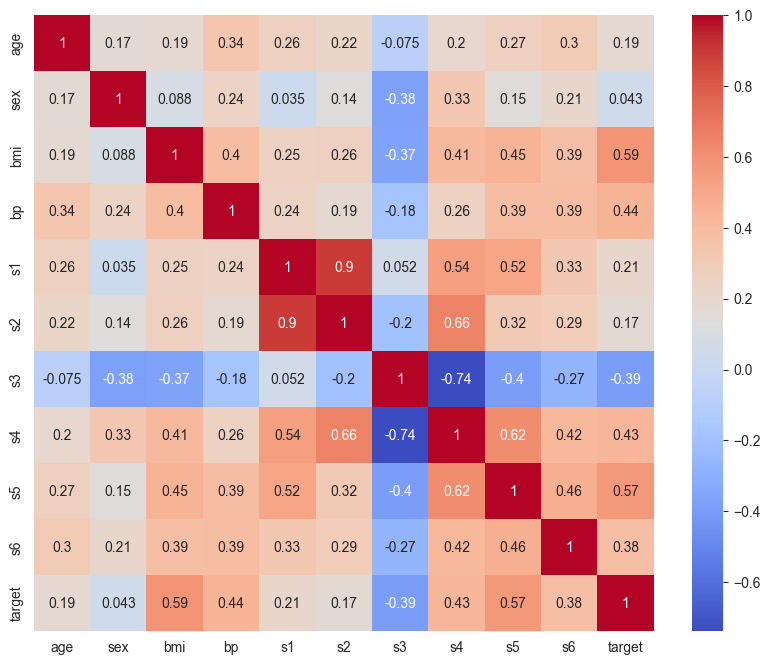

In [7]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    data=df.corr(),
    annot=True,
    cmap="coolwarm",
)

plt.show()

# Machine Learning Regression

## Decision Tree

[Reference] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

### Dataset Definition

In [8]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

In [9]:
len(X_test)/len(X_train)

0.2521246458923513

### Model (Vanilla)

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [12]:
model.score(X_train, y_train)

1.0

In [ ]:
print(model.intercept_, model.coef_)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'intercept_'

#### Feature Importance

In [14]:
model.feature_importances_

array([0.06458641, 0.00667276, 0.41823226, 0.0624936 , 0.08317685,
       0.05338883, 0.063936  , 0.0297882 , 0.15579517, 0.06192992])

In [15]:
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [16]:
_feature_importances = pd.Series(
    model.feature_importances_,
    index=feature_names,
)

_feature_importances

age   0.0646
sex   0.0067
bmi   0.4182
bp    0.0625
s1    0.0832
s2    0.0534
s3    0.0639
s4    0.0298
s5    0.1558
s6    0.0619
dtype: float64

<Axes: >

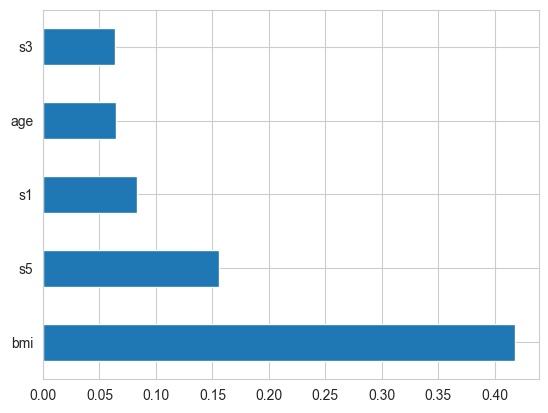

In [17]:
_feature_importances.nlargest().plot(kind="barh")

#### Prediction

In [18]:
y_pred = model.predict(X_test)

In [19]:
print(
    mean_squared_error(y_test, y_pred),
    root_mean_squared_error(y_test, y_pred),
    mean_absolute_percentage_error(y_test, y_pred),
)

4976.797752808989 70.54642267903446 0.45436569299881346


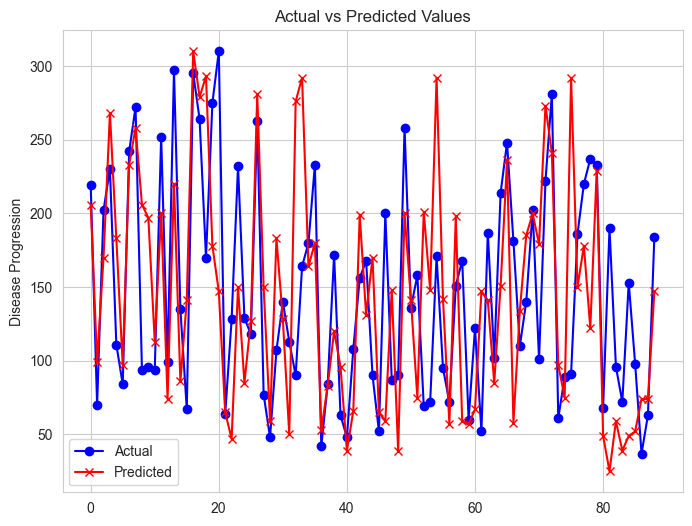

In [20]:
plt.figure(figsize=(8, 6))

plt.plot(y_test.values, label='Actual', marker='o', color='blue')
plt.plot(y_pred, label='Predicted', marker='x', color='red')

plt.title('Actual vs Predicted Values')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

#### Tree Structure

In [21]:
from sklearn.tree import plot_tree

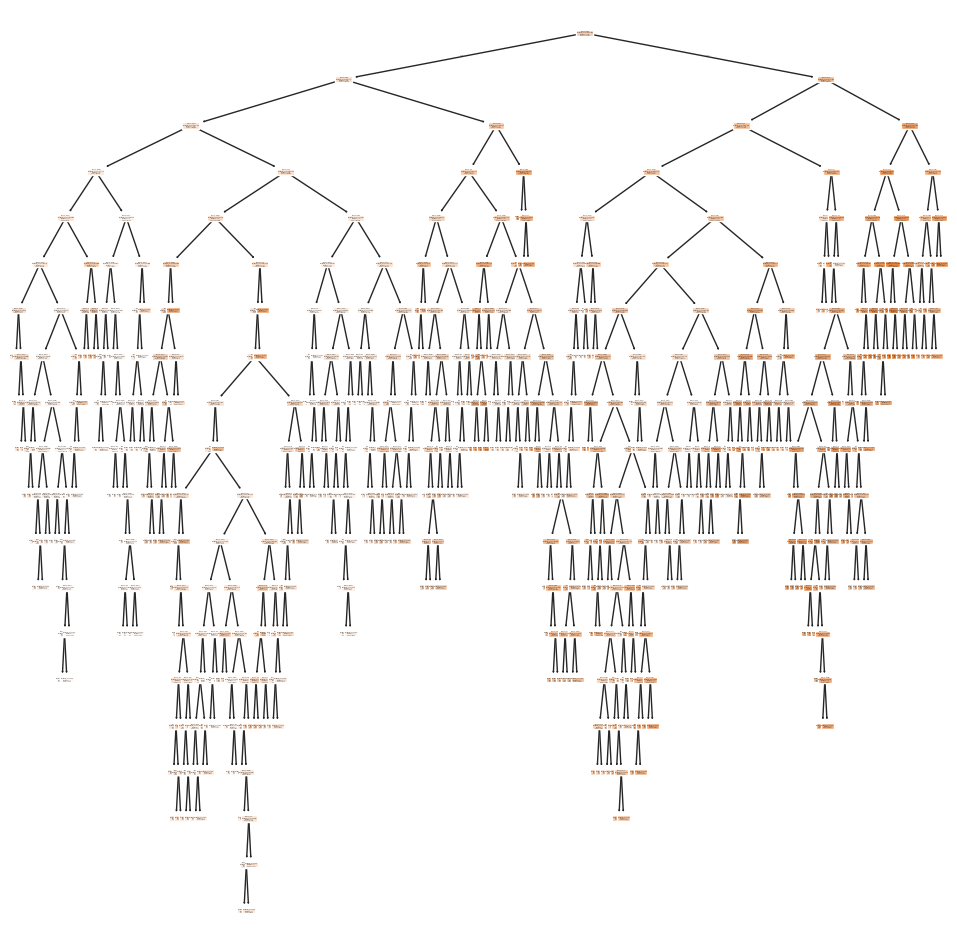

In [22]:
plt.figure(figsize=(12, 12))
plot_tree(model, filled=True)
plt.show()

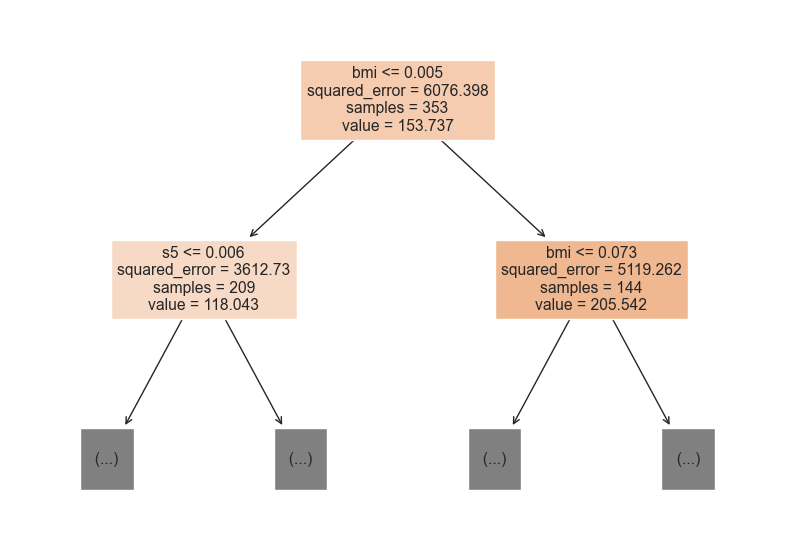

In [22]:
plt.figure(figsize=(10, 7))

plot_tree(
    model,
    filled=True,
    max_depth=1,
    feature_names=feature_names,
)

plt.show()

### Retraining (feat.Prunning)

In [23]:
model = DecisionTreeRegressor(
    max_depth=4,          # 트리의 최대 깊이 
    min_samples_split=10, # 노트 분할 시, 최소한 10개의 샘플이 있어야 함
    min_samples_leaf=5,   # 리프 노드에는 최소한 5개의 샘플리 있어야 함
    random_state=42,
)


In [24]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [25]:
model.score(X_train, y_train)

0.5749510560579061

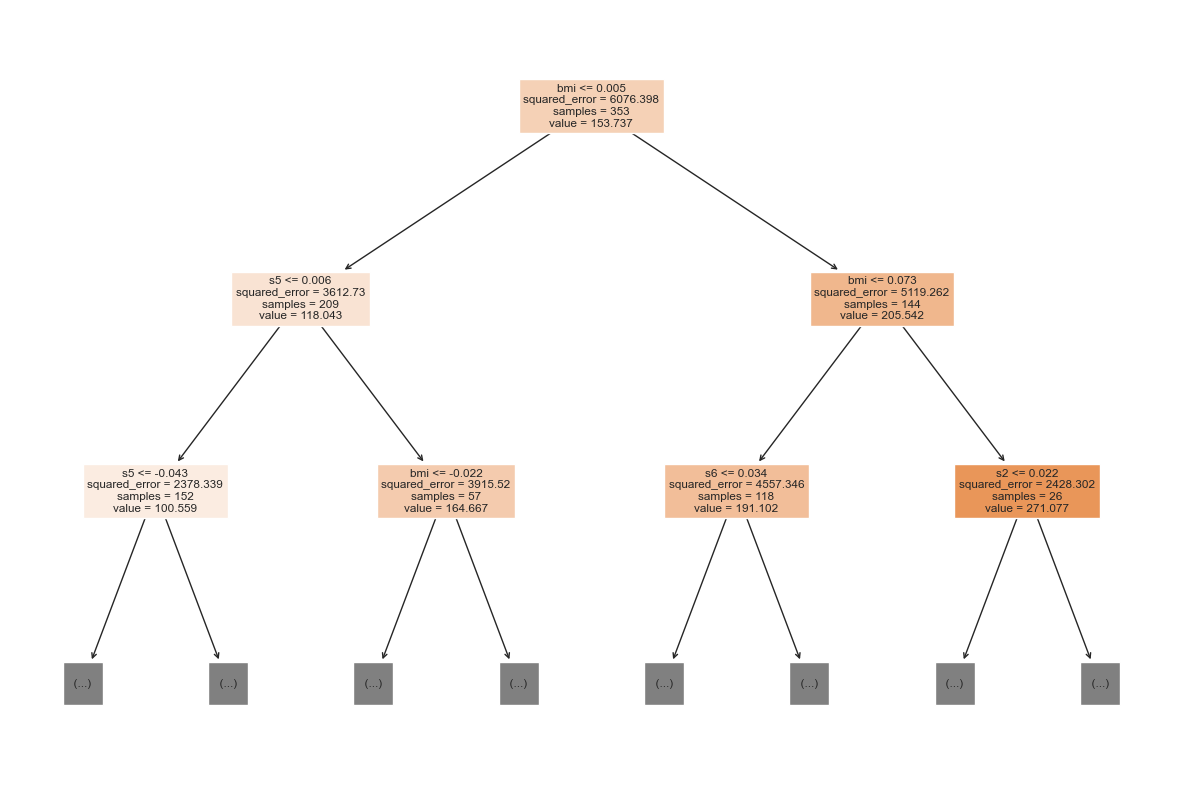

In [26]:
plt.figure(figsize=(15, 10))

plot_tree(
    model,
    filled=True,
    max_depth=2, # 시각화 위해 제한 
    feature_names=feature_names,
)

plt.show()

#### Feature Importance

In [27]:
model.feature_importances_

array([0.        , 0.        , 0.67362722, 0.01783673, 0.01019505,
       0.01925092, 0.01952965, 0.00390029, 0.19795503, 0.05770511])

In [28]:
_feature_importances = pd.Series(
    model.feature_importances_,
    index=feature_names,
)

_feature_importances

age   0.0000
sex   0.0000
bmi   0.6736
bp    0.0178
s1    0.0102
s2    0.0193
s3    0.0195
s4    0.0039
s5    0.1980
s6    0.0577
dtype: float64

<Axes: >

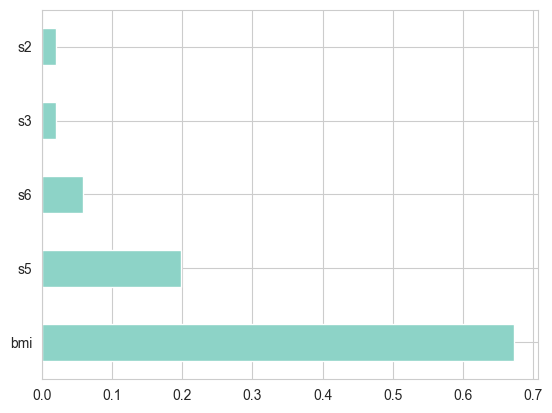

In [29]:
_feature_importances.nlargest().plot(kind="barh")

#### Prediction

In [30]:
y_pred = model.predict(X_test)

In [31]:
print(
    mean_squared_error(y_test, y_pred),
    root_mean_squared_error(y_test, y_pred),
    mean_absolute_percentage_error(y_test, y_pred),
)

2997.896424611375 54.753049454905934 0.3742180031800194


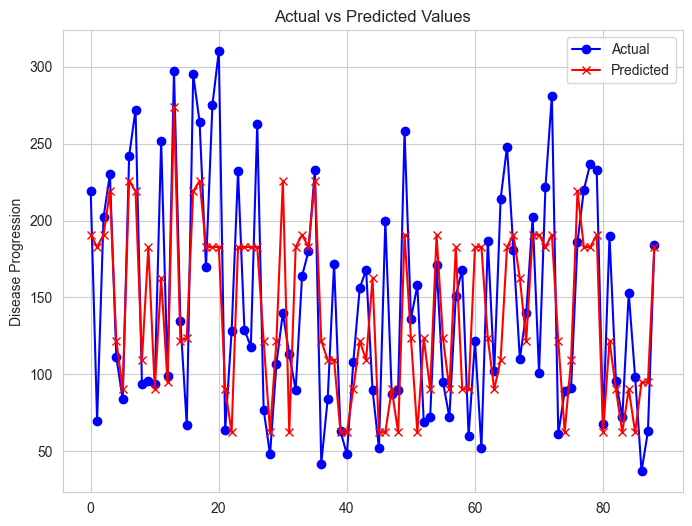

In [32]:
plt.figure(figsize=(8, 6))

plt.plot(y_test.values, label='Actual', marker='o', color='blue')
plt.plot(y_pred, label='Predicted', marker='x', color='red')

plt.title('Actual vs Predicted Values')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

## 여러 알고리즘 결과 확인

(대상) Decision Tree, randomForest, Lasso, Ridge, XGB, LGBM

1. 위 알고리즘 중 가장 최적의 예측 성능을 보이는 알고리즘 확인 
    - Decision Tree는 위에서 Pruning 적용한 버전 적용
    - 현재 단계에서는 cross validation은 고려하지 않음  
2. 최적의 성능을 보이는 알고리즘의 feature importance 확인 
3. 최적의 모델에 대해서만 예측 성능 확인 (RMSE)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
random_state = 42

In [26]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


### 1. Models

In [27]:
# 랜덤 state
random_state = 42
# RandomForest 모델 파라미터
max_depth = 4
min_samples_split = 10
min_samples_leaf = 5


In [53]:
# Decision Tree 모델 정의
cart_model = DecisionTreeRegressor(random_state=random_state)

# 랜덤 포레스트 모델 정의
rf_model = DecisionTreeRegressor(
    max_depth=max_depth,          # 트리의 최대 깊이 
    min_samples_split=min_samples_leaf, # 노트 분할 시, 최소한 10개의 샘플이 있어야 함
    min_samples_leaf=min_samples_leaf,   # 리프 노드에는 최소한 5개의 샘플리 있어야 함
    random_state=random_state,
)

# XGB 모델 정의
xgb_model = XGBRegressor(random_state=random_state)

# LightGBM 모델 정의
lgb_model = LGBMRegressor(
    n_estimators=1000,              # 트리 개수
    learning_rate=0.05,             # 학습률
    num_leaves=31,                  # 리프 개수
    max_depth=-1,                   # 트리의 깊이 제한 (없음)
    min_child_samples=20,           # 리프의 최소 샘플 수
    subsample=0.8,                  # 데이터 샘플링 비율 (80%)
    colsample_bytree=0.8,           # 피처 샘플링 비율 (80%)
    random_state=random_state,                # 재현성
    n_jobs=-1                       # 병렬 처리 (모든 CPU 사용))
)

lasso_model = Lasso(random_state=random_state)
ridge_model = Ridge(random_state=random_state)
model_list = [cart_model, rf_model, xgb_model, lgb_model,lasso_model, ridge_model]

In [54]:
# 모델 학습

def fit_model(model, x_train, y_train):
    model.fit(x_train, y_train)
    print(f"model = {str(model).split('(')[0]} 학습 완료")


for model in model_list:
    fit_model(model, X_train, y_train)

model = DecisionTreeRegressor 학습 완료
model = DecisionTreeRegressor 학습 완료
model = XGBRegressor 학습 완료
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 353, number of used features: 10
[LightGBM] [Info] Start training from score 153.736544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [55]:
#Test data's Score
def getModelScore(model, X_train, y_train):
    score = model.score(X_train,y_train)
    print(f"{str(model).split('(')[0]}'s Score = {score}")

for model in model_list:
    getModelScore(model, X_train, y_train)

DecisionTreeRegressor's Score = 1.0
DecisionTreeRegressor's Score = 0.5749510560579061
XGBRegressor's Score = 0.9999960236879984
LGBMRegressor's Score = 0.9987719979589984
Lasso's Score = 0.3646309911295581
Ridge's Score = 0.4424027835503953


In [56]:
# 예측
def predictModel(model,X_test,y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"{str(model).split('(')[0]}")
    print(f"MSE = {mse:.4f}, RMSE = {rmse:.4f}, MAPE = {mape:.4f}")

for model in model_list:
    predictModel(model, X_test, y_test)
    print("-"*100)

DecisionTreeRegressor
MSE = 4976.7978, RMSE = 70.5464, MAPE = 0.4544
----------------------------------------------------------------------------------------------------
DecisionTreeRegressor
MSE = 2997.8964, RMSE = 54.7530, MAPE = 0.3742
----------------------------------------------------------------------------------------------------
XGBRegressor
MSE = 3351.0016, RMSE = 57.8878, MAPE = 0.4013
----------------------------------------------------------------------------------------------------
LGBMRegressor
MSE = 3309.8242, RMSE = 57.5311, MAPE = 0.3932
----------------------------------------------------------------------------------------------------
Lasso
MSE = 3403.5757, RMSE = 58.3402, MAPE = 0.4711
----------------------------------------------------------------------------------------------------
Ridge
MSE = 3077.4159, RMSE = 55.4745, MAPE = 0.4257
----------------------------------------------------------------------------------------------------


### Best Model

### Feature Importance

### Prediction

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(y_test.values, label='Actual', marker='o', color='blue')
plt.plot(y_pred, label=f'Predicted ({best_model})', marker='x', color='red')

plt.title(f'Actual vs Predicted Values - Best Model: {best_model}')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

--------------------------
** End of Docuemtns **